In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [3]:
#Loading the Dataset
df = pd.read_csv("Insurance_Claim.csv")
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [4]:
#EDA-Exploring and understanding the dataset
#return features,count of non-null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [6]:
#-count,unique,top,freq,mean,std,min,max,q1,q2,q3
df.describe(include="all")

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
count,58592,58592.000000,58592.000000,58592.000000,58592,58592.000000,58592,58592,58592,58592,...,58592,58592,58592,58592,58592,58592,58592,58592,58592.000000,58592.000000
unique,58592,NaN,NaN,NaN,22,NaN,6,11,3,9,...,2,2,2,2,2,2,2,2,NaN,NaN
top,POL045360,NaN,NaN,NaN,C8,NaN,B2,M1,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,NaN,NaN
freq,1,NaN,NaN,NaN,13654,NaN,18314,14948,20532,17796,...,32177,42435,42435,57383,34291,36309,42435,58229,NaN,NaN
mean,NaN,6.111688,1.388473,44.823935,NaN,18826.858667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.759950,0.063968
std,NaN,4.142790,1.134413,6.935604,NaN,17660.174792,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.389576,0.244698
min,NaN,0.000000,0.000000,35.000000,NaN,290.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,2.100000,0.400000,39.000000,NaN,6112.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,5.700000,1.200000,44.000000,NaN,8794.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000
75%,NaN,10.400000,2.200000,49.000000,NaN,27003.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000


In [8]:
df.columns

Index(['policy_id', 'subscription_length', 'vehicle_age', 'customer_age',
       'region_code', 'region_density', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'steering_type', 'turning_radius', 'length',
       'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'claim_status'],
      dtype='object')

In [9]:
df.isnull().sum

<bound method DataFrame.sum of        policy_id  subscription_length  vehicle_age  customer_age  region_code  \
0          False                False        False         False        False   
1          False                False        False         False        False   
2          False                False        False         False        False   
3          False                False        False         False        False   
4          False                False        False         False        False   
...          ...                  ...          ...           ...          ...   
58587      False                False        False         False        False   
58588      False                False        False         False        False   
58589      False                False        False         False        False   
58590      False                False        False         False        False   
58591      False                False        False         False        False 

In [10]:
df.duplicated().sum()

0

In [11]:
#cleaning the data
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [15]:
df = df[['segment', 'customer_age', 'claim_status']].dropna()

In [16]:
#converting to numeric typey
df['customer_age'] = pd.to_numeric(df['customer_age'], errors='coerce')

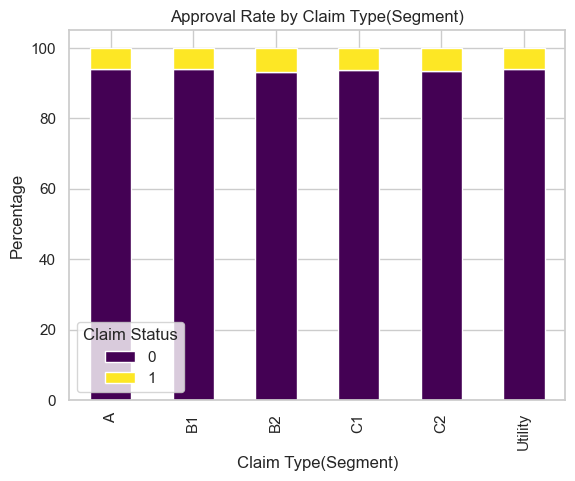

In [17]:
#approval rate by claim type
segment_approval=pd.crosstab(df['segment'],df['claim_status'],normalize='index')*100
segment_approval.plot(kind='bar',stacked=True,colormap='viridis')
plt.title("Approval Rate by Claim Type(Segment)")
plt.ylabel("Percentage")
plt.xlabel("Claim Type(Segment)")
plt.legend(title="Claim Status")
plt.show()

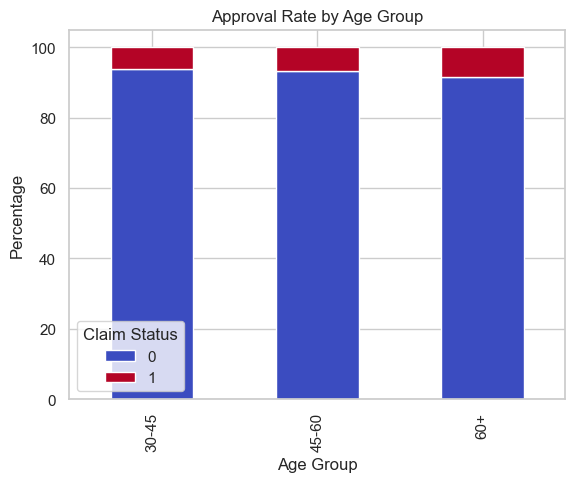

In [18]:
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['<18', '18-30', '30-45', '45-60', '60+']
df['Age Group'] = pd.cut(df['customer_age'], bins=age_bins, labels=age_labels)

age_group_approval = pd.crosstab(df['Age Group'], df['claim_status'], normalize='index') * 100
age_group_approval.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Approval Rate by Age Group")
plt.ylabel("Percentage")
plt.xlabel("Age Group")
plt.legend(title="Claim Status")
plt.show()


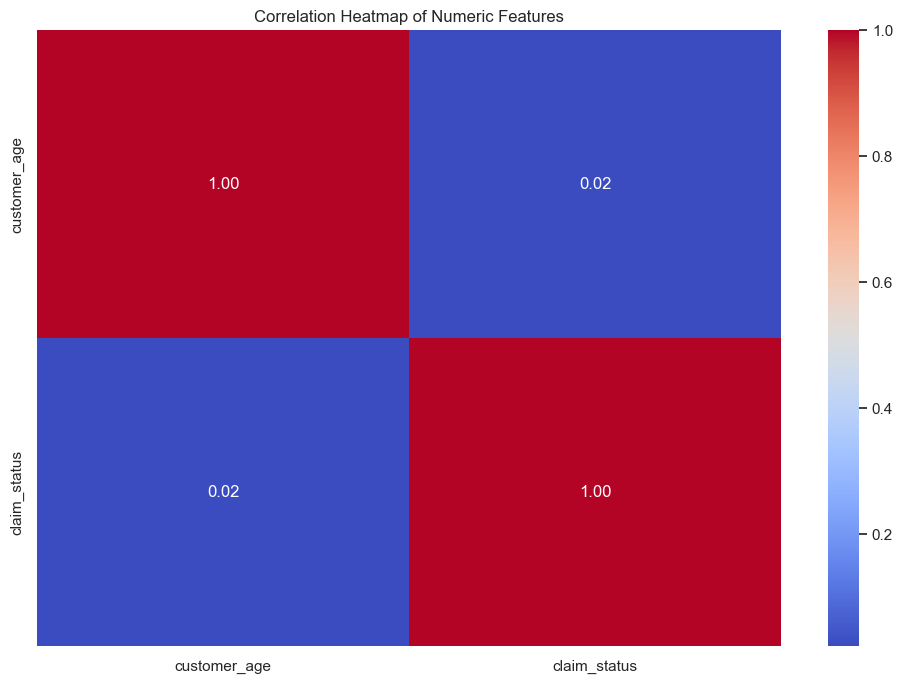

In [20]:
import numpy as np
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()